# Set up environment

In [1]:
import numpy as np
from collections import Counter

from keras import layers
from keras import models
from keras.utils import to_categorical

import matplotlib.pyplot as plt

/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Import results

In [2]:
# directory
datadir = "/data/deep-learning-group/test_data/simulation/"

# output the value
file_name = "data_img.npz"

# open the file for reading
file_object = open(datadir + file_name, 'rb') # wb --- write binary

# read data
data         = np.load(file_object)
data_samples = data["data_samples"]
data_labels  = data["data_labels"]
data_tsne    = data["data_tsne"]
data_img     = data["data_img"]
data_img     = np.moveaxis(data_img, 1, -1) # move axis

# close the file
file_object.close()

In [3]:
num_samples_tot, num_cells_tot, num_features = data_samples.shape

print("================")
print("Total Samples:         ", num_samples_tot)
print("Total cell in a sample:", num_cells_tot)
print("Number of features:    ", num_features)
print("================")
print("check dimension")
print("- Samples", data_samples.shape)
print("- Labels ", data_labels.shape)
print("- t-SNE  ", data_tsne.shape)
print("- Images ", data_img.shape)

print("================")
print("check labels")
print(Counter(data_labels))

Total Samples:          1000
Total cell in a sample: 1000
Number of features:     3
check dimension
- Samples (1000, 1000, 3)
- Labels  (1000,)
- t-SNE   (1000, 1000, 2)
- Images  (1000, 128, 128, 3)
check labels
Counter({0: 700, 1: 300})


In [4]:
data_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
np.random.seed(0)
idx = np.random.permutation(range(num_samples_tot))

# randomly pick images
samples = data_samples[idx]
labels  = data_labels[idx]
tsnes   = data_tsne[idx]
images  = data_img[idx]

# standardize images
images = [(img - np.min(img)) / (np.max(img) - np.min(img)) for img in images]
images = np.array(images)
images.shape

(1000, 128, 128, 3)

In [6]:
labels

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

# Plot data

In [7]:
def plot_tsne_img(ax, sample, tsne, img, n_grid = 128, point_size = 2, alpha = 0.5):
    x   = tsne[:, 0]
    y   = tsne[:, 1]
    z   = sample[:, 0]

    x_c = np.linspace(min(x), max(x), n_grid)
    y_c = np.linspace(min(y), max(y), n_grid)
    x_c, y_c = np.meshgrid(x_c, y_c)
    z_c = img
    
    ax.scatter(
        x_c, y_c, c = z_c, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Blues'))
    
    ax.scatter(
        x, y, c = z, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Reds'))

In [8]:
# Check dimension
sample = samples[0]
tsne   = tsnes[0]
img    = images[0]

print(sample.shape)
print(tsne.shape)
print(img.shape)

(1000, 3)
(1000, 2)
(128, 128, 3)


[[1 1 0]
 [0 0 1]
 [0 0 0]]


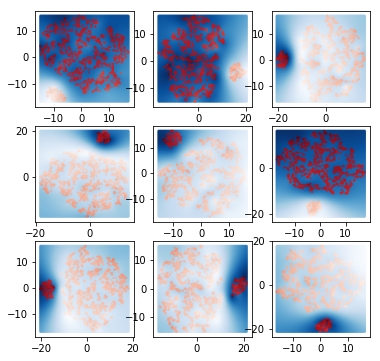

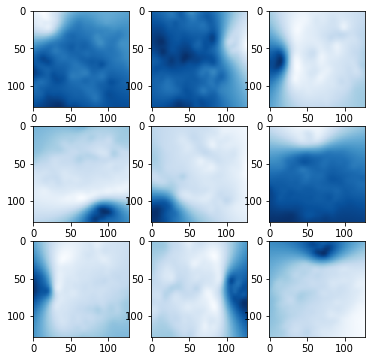

In [9]:
n = 3
fig1, axes1 = plt.subplots(n, n, figsize = (6, 6))
fig2, axes2 = plt.subplots(n, n, figsize = (6, 6))

# labels
print(labels[:n**2].reshape(n, n))

# images
for idx1 in range(n):
    for idx2 in range(n):
        idx    = idx1 * n + idx2
        sample = samples[idx]
        tsne   = tsnes[idx]
        img    = images[idx, :, :, 0]
        
        plot_tsne_img(axes1[idx1][idx2], sample, tsne, img)
        axes2[idx1][idx2].imshow(img, cmap=plt.get_cmap('Blues'))
        
plt.show()

The imshow will start to plot the first row at the top of the image, while the tsne plot I showed assigned the first row at the bottom. Therefore, the first group of plots will be upside down compare to the second group of plots

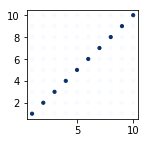

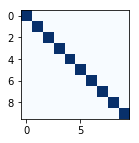

In [10]:
# for example
n_grid = 10
img = np.eye(n_grid)

x_c = np.linspace(1, n_grid, n_grid)
y_c = np.linspace(1, n_grid, n_grid)
x_c, y_c = np.meshgrid(x_c, y_c)

fig1, axes1 = plt.subplots(1, 1, figsize = (2, 2))
fig2, axes2 = plt.subplots(1, 1, figsize = (2, 2))
axes1.scatter(x_c, y_c, c = img, s = 10, cmap=plt.get_cmap('Blues'))
axes2.imshow(img, cmap=plt.get_cmap('Blues'))
plt.show()

# Divide plots to train and test

In [11]:
num_train = int(num_samples_tot * 0.6)
num_test  = num_samples_tot - num_train
print(num_train, num_test)

600 400


In [12]:
train_images = images[:num_train]
train_labels = labels[:num_train]
test_images  = images[num_train:]
test_labels  = labels[num_train:]

print("==========")
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)
print("++++++++++++++++++++++++++++")

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)

Train Data
- Image:  (600, 128, 128, 3)
- Label:  (600,)
Test Data
- Image:  (400, 128, 128, 3)
- Label:  (400,)
++++++++++++++++++++++++++++
Train Data
- Image:  (600, 128, 128, 3)
- Label:  (600, 2)
Test Data
- Image:  (400, 128, 128, 3)
- Label:  (400, 2)


# Build a Keras Conv2D model

In [13]:
# initialize a model
np.random.seed(0)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (11, 11), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (11, 11), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      11648     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        247872    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        495680    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
__________

In [14]:
#model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Train on 600 samples, validate on 400 samples
Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 4.3996 - acc: 0.6667 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 2/10
600/600 [==============================] - 1s 876us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 3/10
600/600 [==============================] - 1s 922us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 4/10
600/600 [==============================] - 1s 902us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 5/10
600/600 [==============================] - 1s 935us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 6/10
600/600 [==============================] - 1s 926us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 7/10
600/600 [==============================] - 1s 948us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 8/10
600/600

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

400/400 [==============================] - 0s 494us/step


0.6925

In [16]:
history.history

{'acc': [0.6666666666666666,
  0.7049999992052715,
  0.705,
  0.7049999992052715,
  0.7050000007947286,
  0.7049999992052715,
  0.7050000007947286,
  0.7049999992052715,
  0.7050000007947286,
  0.7049999992052715],
 'loss': [4.399609184265136,
  4.754838253657023,
  4.754838078816732,
  4.754838097890218,
  4.754838094711304,
  4.754838161468506,
  4.754838199615478,
  4.754838197231293,
  4.754838148752849,
  4.754838199615478],
 'val_acc': [0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925,
  0.6925],
 'val_loss': [4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899,
  4.956314315795899]}

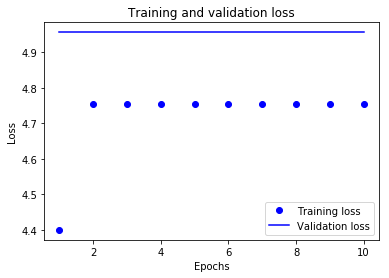

In [17]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Test Second Models

In [26]:
# initialize a model
np.random.seed(0)
#np.random.seed(11)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [27]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 0.7123 - acc: 0.6200 - val_loss: 0.6468 - val_acc: 0.6925
Epoch 2/20
600/600 [==============================] - 0s 787us/step - loss: 0.7867 - acc: 0.8717 - val_loss: 0.3306 - val_acc: 1.0000
Epoch 3/20
600/600 [==============================] - 0s 797us/step - loss: 0.3120 - acc: 0.9000 - val_loss: 0.0228 - val_acc: 1.0000
Epoch 4/20
600/600 [==============================] - 0s 808us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 5/20
600/600 [==============================] - 0s 827us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 6/20
600/600 [==============================] - 0s 788us/step - loss: 5.0187e-04 - acc: 1.0000 - val_loss: 2.1560e-04 - val_acc: 1.0000
Epoch 7/20
600/600 [==============================] - 0s 796us/step - loss: 1.1154e-04 - acc: 1.0000 - val_loss: 1.1618e-04 - val_acc: 1.0000
Ep

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

400/400 [==============================] - 0s 432us/step


1.0

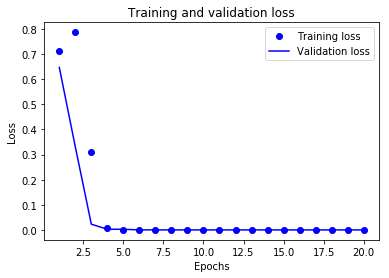

In [29]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Separable Conv2D (Try one layer only)

```
layers.SeparableConvolution2D?
layers.SeparableConv2D?
```

In [22]:
# initialize a model
np.random.seed(0)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), data_format='channels_last'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 126, 126, 32)      155       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                15241280  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 15,260,061
Trainable params: 15,260,061
Non-trainable params: 0
________________________________________________________________

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 4.3991 - acc: 0.6733 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 8/20
600/600 [==========

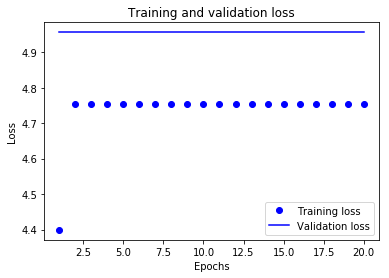

In [23]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Separable Conv2D (Try more layers)

In [24]:
# initialize a model
np.random.seed(0)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), data_format='channels_last'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', data_format='channels_last'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', data_format='channels_last'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_2 (Separabl (None, 126, 126, 32)      155       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 61, 61, 64)        2400      
_________________________________________________________________
flatten_4 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                15241280  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 15,243,965
Trainable params: 15,243,965
Non-trainable params: 0
________________________________________________________________

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 1.1563 - acc: 0.7833 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 4.5300e-04 - val_acc: 1.0000
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 2.6290e-04 - acc: 1.0000 - val_loss: 1.9984e-04 - val_acc: 1.0000
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 1.1635e-04 - acc: 1.0000 - val_loss: 8.8551e-05 - val_acc: 1.0000
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 3.6179e-05 - acc: 1.0000 - val_loss: 1.2494e-05 - val_acc: 1.0000
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 6.4186e-06 - acc: 1.0000 - val_loss: 4.5056e-06 - val_acc: 1.0000
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 2.5243e-06 - acc: 1.0000 - val_loss: 3.7391e-06 - va

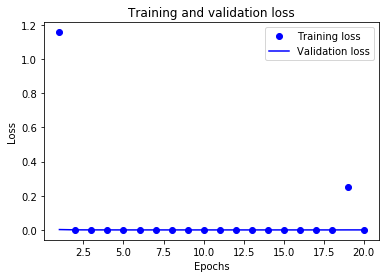

In [25]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Xception

https://keras.rstudio.com/reference/application_xception.html

https://keras.io/applications/#xception

```
keras.applications.xception.Xception(
    include_top=True, 
    weights='imagenet',  # weights 
                         #     NULL (random initialization), 
                         #     imagenet (ImageNet weights), or 
                         #     the path to the weights file to be loaded.
                         
    input_tensor=None, 
    
    input_shape=None,    # input_shape (optional) shape list, 
                         #     only to be specified if include_top is FALSE
                         
    pooling=None,        # pooling (Optional) pooling mode 
                         #     for feature extraction when include_top is FALSE
                         #     NULL
                         #     avg
                         #     max
    
    classes=1000)        # classes (optional) number of classes to classify images into, 
                         #     only to be specified if include_top is TRUE, and 
                         #     if no weights argument is specified.
```

In [69]:
#keras.applications.xception.Xception
from keras.applications.xception import Xception

In [70]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model = Xception(
    include_top = False,
    input_shape = (128, 128, 3),
    pooling     = "max",
    classes     = 2)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# model summary
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [71]:
# train model
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

ValueError: Error when checking target: expected global_max_pooling2d_2 to have shape (None, 2048) but got array with shape (600, 2)

I try to read some examples in the book

In [47]:
from keras import Input
from keras.models import Sequential, Model
from keras import layers

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Deep Learning with Python Page 248
from keras import layers
from keras import applications
from keras import Input
xception_base = applications.Xception(
    weights=None,
    include_top=False)
left_input      = Input(shape=(250, 250, 3))
right_input     = Input(shape=(250, 250, 3))
left_features   = xception_base(left_input)
right_input     = xception_base(right_input)
merged_features = layers.concatenate([left_features, right_input], axis=-1)

Try to build the model again

In [76]:
xception_base = Xception(
    weights=None,
    include_top=False)

input_tensor = Input(shape=(128, 128, 3))
x = xception_base(input_tensor)
output_tensor = layers.Dense(2, activation='softmax')(x)
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
xception (Model)             multiple                  20861480  
_________________________________________________________________
dense_18 (Dense)             (None, 4, 4, 2)           4098      
Total params: 20,865,578
Trainable params: 20,811,050
Non-trainable params: 54,528
_________________________________________________________________
None


In [77]:
# train model
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

ValueError: Error when checking target: expected dense_18 to have 4 dimensions, but got array with shape (600, 2)